# Forecast of the Macroeconomic situation after COVID-19 given Unemployment and Inflation

The COVID-19 pandemic has had far-reaching economic consequences including the COVID-19 recession, the second largest global recession in recent history, decreased business in the services sector during the COVID-19 lockdowns, the 2020 stock market crash, which included the largest single-week stock market decline since the financial crisis of 2007–2008 and the impact of the COVID-19 on financial markets, the 2021–2022 global supply chain crisis, the 2021–2022 inflation surge, shortages related to the COVID-19 pandemic including the 2020–present global chip shortage, panic buying,and price gouging. It led to governments providing an unprecedented amount of stimulus. The pandemic was also a factor in the 2021–2022 global energy crisis and 2022 food crises. In our case, we want, given the macroeconomic data we possess, to gauge the impact of the recession on the US economy and more importantly, if we are really at the door of a recession. We will use different indicators such as GDP or wage but we will focus on the Unemployment-Inflation Tradeoff in this study.

In [2]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
import datetime as dt
import matplotlib.dates as mdates 
import seaborn as sns
import datetime as dt
import pendulum

In [3]:
unrate=pd.read_csv("UNRATE.csv",index_col="DATE", parse_dates=True)
cpi=pd.read_csv("Downloads\CPIAUCSL.csv", index_col="DATE",parse_dates=True)
nre=pd.read_csv("NROU.csv", parse_dates=True)
wage=pd.read_csv("wage.csv", index_col="DATE",parse_dates=True)
expected_inf=pd.read_csv("MICH (1).csv",parse_dates=True)
gdp=pd.read_csv("GDPC1.csv",index_col="DATE",parse_dates=True)

In [1204]:
index=pd.date_range("1978-01-31", "2021-12-31",freq='M')

In [1205]:
nre["DATE"]=pd.date_range('1949-01-31 00:00', freq='Q-JAN', periods=292)
nre["DATE"] = pd.to_datetime(nre["DATE"], format='%Y-%m-%d')
nre.set_index(["DATE"],inplace=True)

In [1206]:
expected_inf["DATE"]=index
expected_inf["DATE"] = pd.to_datetime(expected_inf["DATE"], format='%Y-%m-%d')
expected_inf.set_index(["DATE"],inplace=True)

In [1207]:
expected_inf=expected_inf.resample("A").mean()

In [1208]:
df=pd.DataFrame()

We adjust the Inflation and Unmployment Rate on a yearly basis :

In [1209]:
df["Yearly Inflation"]=(cpi["CPIAUCSL"].pct_change()*100).resample("A").sum()
df["Unemployment Rate"]=unrate["UNRATE"].resample("A").mean()

In [1210]:
df

,Yearly Inflation,Unemployment Rate
DATE,,
1948-12-31,1.576035,3.750000
1949-12-31,-1.839581,6.050000
1950-12-31,5.665817,5.208333
1951-12-31,5.829900,3.283333
1952-12-31,0.905522,3.025000
...,...,...
2018-12-31,1.899607,3.891667
2019-12-31,2.239656,3.675000
2020-12-31,1.278323,8.091667


We will remove the last row because 2022 is still running therefore we're missing the last 3 quarters to sum them up in order to obtain the yearly inflation.

In [1211]:
df.drop(df.tail(1).index,inplace=True)

In [1212]:
start=["1948-11-01","1953-07-01","1957-08-01","1960-04-01","1969-12-01","1973-11-01","1980-01-01","1981-07-01","1990-07-01","2001-03-01","2007-12-01","2020-02-01"]
end=["1949-10-31","1954-05-31","1958-04-30","1961-02-28","1970-11-30","1975-03-31","1980-07-31","1982-11-30","1991-03-31","2001-11-30","2009-06-30","2020-04-30",]
col=["royalblue","lightsteelblue","navy","blue","slateblue","darkslateblue","blueviolet","indigo","darkviolet","thistle","violet","deeppink"]
lab=["Great Depression","New Deal Recession","End-of-the-WW2","1949 Recession", "Korean War","1958 Recession", "1960 Recession","Vietnam War","1973 Oil Crisis","1980 Recession","1979 Oil Crisis","Early 90s recession", "Early 00's recession", "2008 Subprime Crisis", "COVID Crisis"]

Text(0, 0.5, 'Percentage')

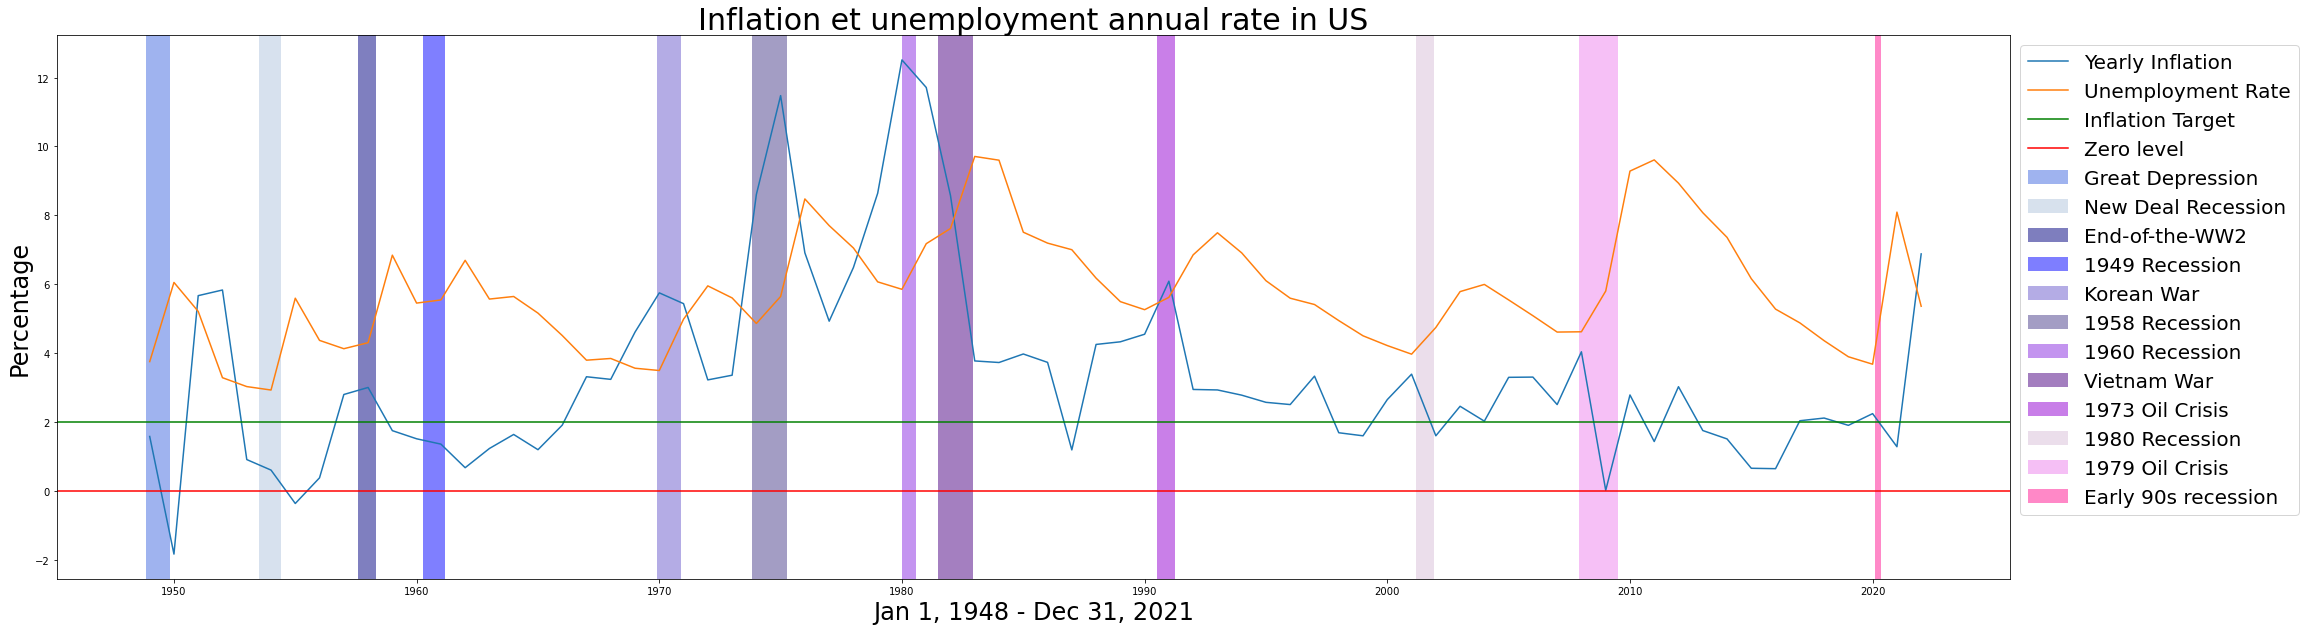

In [1213]:
plt.figure(figsize=(35,10))
for i in df.columns:
    plt.plot(df[i],label=i)
    #plt.xticks(rotation=45,fontsize=18)
    #plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
for i in range(len(start)):
    plt.axvspan(start[i], end[i], color=col[i], alpha=0.5, lw=0,label=lab[i])
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.axhline(2, color="g",label="Inflation Target")
plt.axhline(0, color="r",label="Zero level")
plt.legend(bbox_to_anchor=(1,1),loc="upper left",fontsize=20)
plt.title("Inflation et unemployment annual rate in US",fontsize=30)
plt.xlabel("Jan 1, 1948 - Dec 31, 2021", fontsize=24)
plt.ylabel("Percentage",fontsize=24)

A. W. Phillips stated that inflation and unemployment have a stable and inverse relationship. This economic concept led to the Phillips Curve, and the theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment. We can see that for most recessions and economics crises followed up a contermonotonic trend of inflation and unemployment rate; decrease of inflation and increase of unemployment at the end of WW2 and the 1960 recession, increase of inflation and decrease of unemployment at the end the the Great Depression,etc.

The Phillips curve states that inflation and unemployment have an inverse relationship. Higher inflation is associated with lower unemployment and vice versa.Let's check this statement with our data by calculating the correlation between inflation and unemployment rate:

In [1214]:
df.corr()

,Yearly Inflation,Unemployment Rate
Yearly Inflation,1.000000,0.097923
Unemployment Rate,0.097923,1.000000


<AxesSubplot:xlabel='Unemployment Rate', ylabel='Yearly Inflation'>

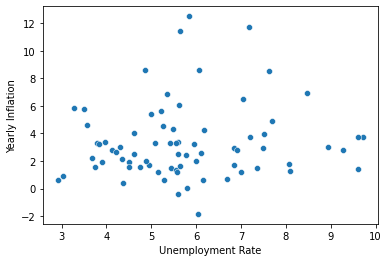

In [1215]:
#Short-term Phillips Curve Yearly basis
sns.scatterplot(data=df, x="Unemployment Rate", y="Yearly Inflation")

[Text(0.5, 1.0, 'Long-Term philipps Curve for Yearly basis data')]

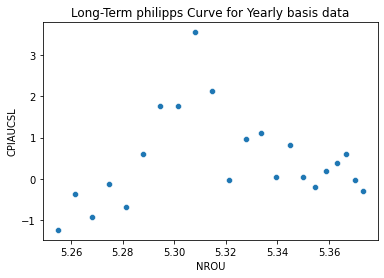

In [1235]:
#Long-term Phillips Curve Yearly basis
sns.scatterplot(x=nre["NROU"][:22], y=quarterly_infl["CPIAUCSL"][:22]).set(title="Long-Term philipps Curve for Yearly basis data")

We see little to no correlation, and no negative correlation moreover. How can we explain that result given Phillips statements ?

The scatterplot is in line with the numerical result and shows no obvious visual correlation 

Let's do the same determine whether a correlation is possible or not for economic data before the 70's Oil Crisis, which is the first case of "Stagflation":

In [1216]:
df[:22].corr()

,Yearly Inflation,Unemployment Rate
Yearly Inflation,1.00000,-0.44327
Unemployment Rate,-0.44327,1.00000


In [1217]:
#quarterly_infl["CPIAUCSL"]=quarterly_infl["CPIAUCSL"].drop(quarterly_infl["CPIAUCSL"][-1])

In [1218]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\anaconda3\l

[Text(0.5, 1.0, 'Short-Term philipps Curve for Yearly basis data')]

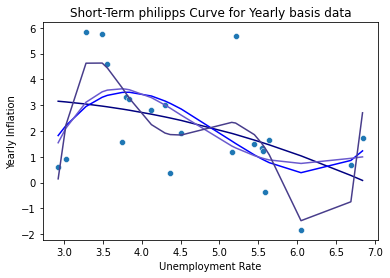

In [1219]:
#Short-term Phillips Curve Yearly basis

for i in range(2,6):
    poly=PolynomialFeatures(degree=i)
    x_poly=poly.fit_transform(df["Unemployment Rate"][:22].values.reshape(-1,1))
    polyreg=LinearRegression()
    polyreg.fit(x_poly,df[:22]["Yearly Inflation"])
    sns.lineplot(df["Unemployment Rate"][:22],polyreg.predict(x_poly),color=col[i])
sns.scatterplot(data=df[:22], x="Unemployment Rate", y="Yearly Inflation").set(title="Short-Term philipps Curve for Yearly basis data")

We will keep a value of the polynomial 2 as it fits the better the data and thus is the best representation of the Philips Curve:

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Short-Term philipps Curve for Yearly basis data')]

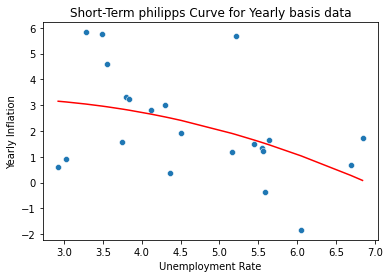

In [1220]:
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(df["Unemployment Rate"][:22].values.reshape(-1,1))
polyreg=LinearRegression()
polyreg.fit(x_poly,df[:22]["Yearly Inflation"])
sns.lineplot(df["Unemployment Rate"][:22],polyreg.predict(x_poly),color="r")
sns.scatterplot(data=df[:22], x="Unemployment Rate", y="Yearly Inflation").set(title="Short-Term philipps Curve for Yearly basis data")

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Long-Term philipps Curve for Yearly basis data')]

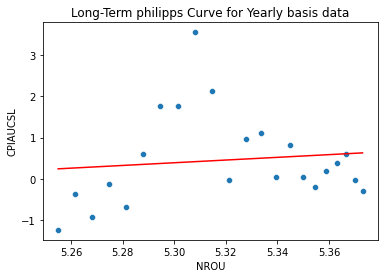

In [1223]:
#Long-Term Phillipps Curve Yearly basis
poly=PolynomialFeatures(degree=1)
x_poly=poly.fit_transform(nre["NROU"][:22].values.reshape(-1,1))
polyreg=LinearRegression()
polyreg.fit(x_poly,quarterly_infl["CPIAUCSL"][:22])
sns.lineplot(nre["NROU"][:22],polyreg.predict(x_poly),color="r")
sns.scatterplot(x=nre["NROU"][:22], y=quarterly_infl["CPIAUCSL"][:22]).set(title="Long-Term philipps Curve for Yearly basis data")

The results are more interpretable since we only used data before 1970.Indeed, the Phillips curve was a concept used to guide macroeconomic policy in the 20th century, but was called into question by the stagflation of the 1970's.


Understanding the Phillips curve in light of consumer and worker expectations, shows that the relationship between inflation and unemployment may not hold in the long run, or even potentially in the short run.

In [1224]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

We will use a unit root test to verify that both inflation and unemployment rate are stationary. This will allow us to determine whether if the properties of the time series change over time:

In [1225]:
def ADF_Stationarity_Test(timeseries, SignificanceLevel, printResults = True):

        adfTest = adfuller(timeseries, autolag='AIC')
        
        pValue = adfTest[1]
        
        if (pValue<SignificanceLevel):
            print("The time series is stationary")
        else:
            print("The time series{}is not stationary")
        
        dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

        for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
        print('Augmented Dickey-Fuller Test Results:')
        print(dfResults)

In [1226]:
ADF_Stationarity_Test(df["Yearly Inflation"], 0.05, printResults = True)

The time series is stationary
Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -3.549283
P-Value                  0.006808
# Lags Used              0.000000
# Observations Used     73.000000
Critical Value (1%)     -3.523284
Critical Value (5%)     -2.902031
Critical Value (10%)    -2.588371
dtype: float64


In [1227]:
adfuller(df["Yearly Inflation"])

(-3.549282929422162,
 0.006808023482530702,
 0,
 73,
 {'1%': -3.5232835753964475,
  '5%': -2.902030597326081,
  '10%': -2.5883710883843123},
 250.9688669588274)

In [1228]:
ADF_Stationarity_Test(df["Unemployment Rate"], 0.05, printResults = True)

The time series is stationary
Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -3.522466
P-Value                  0.007429
# Lags Used              1.000000
# Observations Used     72.000000
Critical Value (1%)     -3.524624
Critical Value (5%)     -2.902607
Critical Value (10%)    -2.588679
dtype: float64


The employment rate and inflation are stationary give the Augmented Dickey-Fuller Test. The two time series are originated from the same distribution and are time invariant.

In fact, Friedman revised the theory especially for the long term and noticed that expected inflation played  huge role on this process. If the employed consumer excpects a rise in inflation he will ask for a wage rise in order no to lose purchase power; this pressure on wages is therefore constant and has in this case no particular relation with unemployment rate. The Friedman's theory proved to be right after the 1973 Oil Crisis, which was a high inflation period accompanied by a high unemployment rate. It resulted in an move away from relying on controlling inflation with respect to Unemployment which is no longer trustworthy. Friedman instead suggested the the Central Banks should focus on the inflation Target to deal with inflation rather than the Unemployment which proved itself not always reliable.

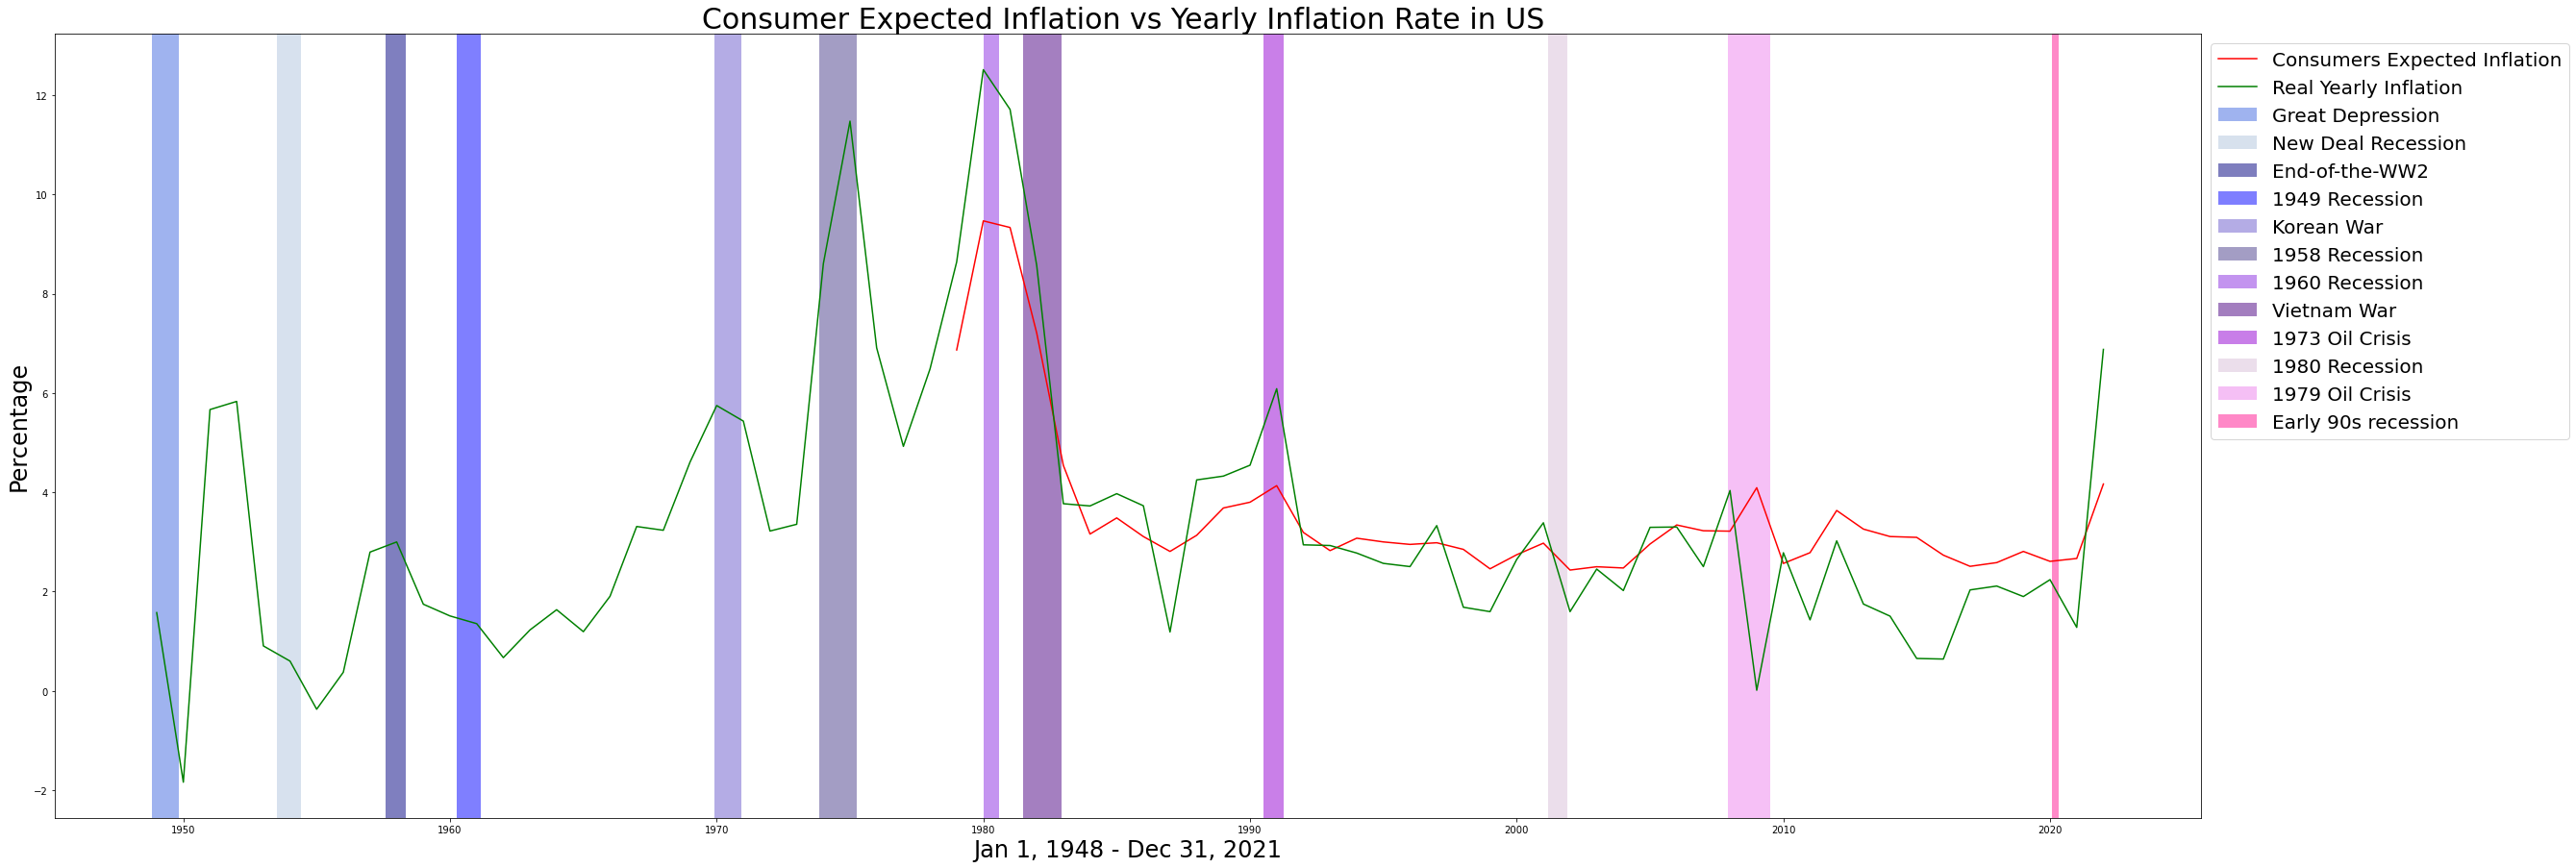

In [1230]:
plt.figure(figsize=(40,15))
plt.plot(expected_inf["MICH"],label="Consumers Expected Inflation",color="r")
plt.plot(df["Yearly Inflation"],label="Real Yearly Inflation",color="green")

for i in range(len(start)):
    plt.axvspan(start[i], end[i], color=col[i], alpha=0.5, lw=0,label=lab[i])
    plt.legend(bbox_to_anchor=(1,1), loc="upper left",fontsize=20)
plt.title("Consumer Expected Inflation vs Yearly Inflation Rate in US ",fontsize=30)
plt.xlabel("Jan 1, 1948 - Dec 31, 2021", fontsize=24)
plt.ylabel("Percentage",fontsize=24)    
plt.show()

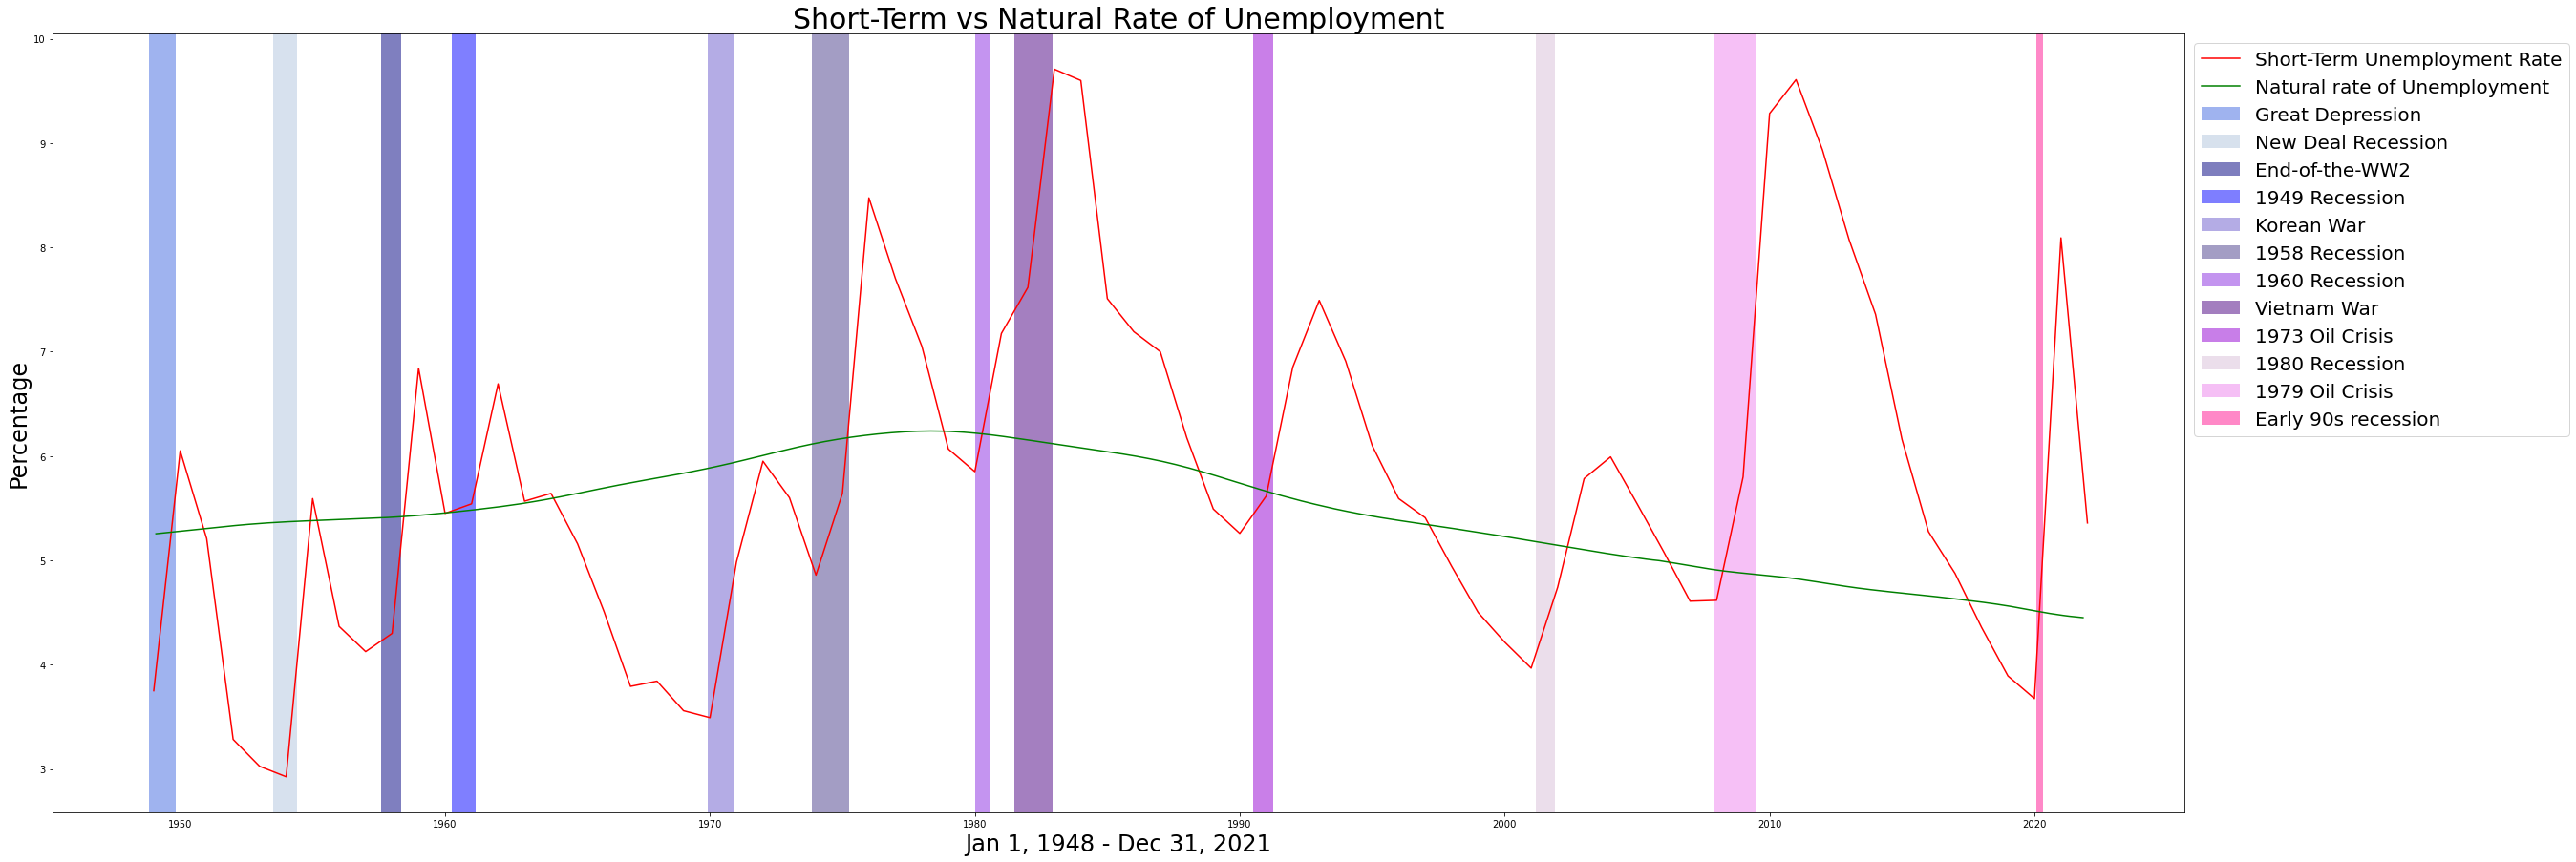

In [1231]:
plt.figure(figsize=(40,15))
plt.plot(df["Unemployment Rate"],label="Short-Term Unemployment Rate",color="r")
plt.plot(nre["NROU"],label="Natural rate of Unemployment",color="green")
plt.plot()
for i in range(len(start)):
    plt.axvspan(start[i], end[i], color=col[i], alpha=0.5, lw=0,label=lab[i])
    plt.legend(bbox_to_anchor=(1,1), loc="upper left",fontsize=20)
plt.title("Short-Term vs Natural Rate of Unemployment",fontsize=30)
plt.xlabel("Jan 1, 1948 - Dec 31, 2021", fontsize=24)
plt.ylabel("Percentage",fontsize=24)    
plt.show()

We observe that after every economic choc the Short-term rate increase significantly then stabilize around the natural rate. Sometimes it slips beyound the natural rate; it implies an uncommon level of employment, therefore a pressure on wages, therefore a higher inflation. We will also add the GDP that we will normalize to fit in the graph. Its evolution in the pandemic period will be useful to determine the presence of Stagflation, given that the staglation is characterized by economic stagnation accompanied by rising prices. Let's combine all those curves in the same plot: 

In [4]:
norm_gdp=(gdp-gdp.mean())/gdp.std()

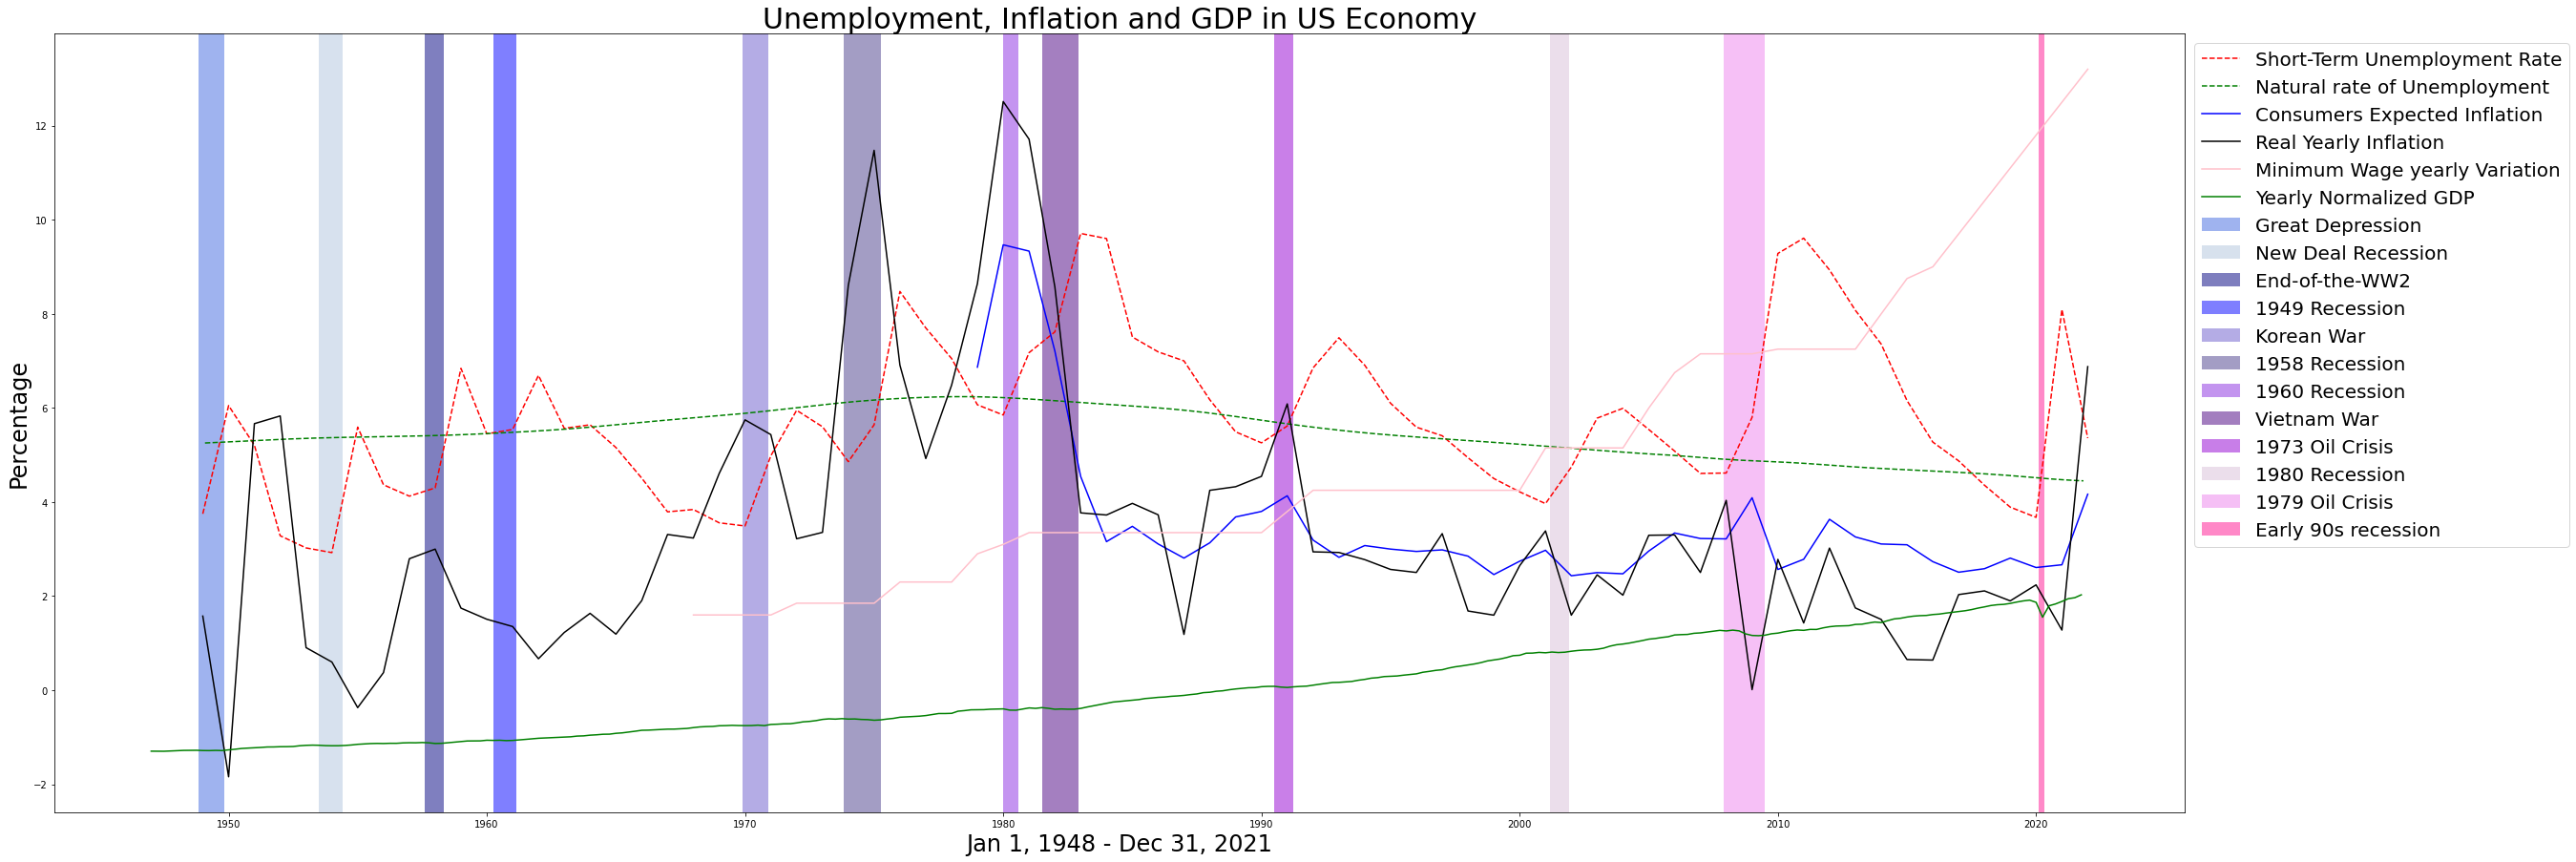

In [1232]:
plt.figure(figsize=(40,15))
plt.plot(df["Unemployment Rate"],label="Short-Term Unemployment Rate",color="r",linestyle="--")
plt.plot(nre["NROU"],label="Natural rate of Unemployment",color="green",linestyle="--")
plt.plot(expected_inf["MICH"],label="Consumers Expected Inflation",color="blue")
plt.plot(df["Yearly Inflation"],label="Real Yearly Inflation",color="black")
plt.plot(wage["STTMINWGNY"],label="Minimum Wage yearly Variation",color="pink")
plt.plot(norm_gdp,label="Yearly Normalized GDP",color="green")

for i in range(len(start)):
    plt.axvspan(start[i], end[i], color=col[i], alpha=0.5, lw=0,label=lab[i])
    plt.legend(bbox_to_anchor=(1,1), loc="upper left",fontsize=20)
plt.title("Unemployment, Inflation and GDP in US Economy",fontsize=30)
plt.xlabel("Jan 1, 1948 - Dec 31, 2021", fontsize=24)
plt.ylabel("Percentage",fontsize=24)    
plt.show()

Since the covid-19 economic crisis, all indicators are hinting to a "Stagflation";an exponential growth of the inflation coupled to a short-term unemployment rate still above the natural level. The customer/worker inflation expectation still hasn't matched the real inflation rate, that would imply more stress on the wages. The GDP is on the same level since 2019 and inflation reached a 40-year record. Moreover, we expect more inflation pressure due to rising energy prices from the actual geopolitic context and the FED is already announcing 6 to 8 interest rate hikes, hitting in the stomach the stock market and the tech brands. Despite this brief analysis, we can safely say that we entering into the StagFlation.

### Source of Macroeconomic Data

FRED: https://fred.stlouisfed.org